In [598]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [599]:
data = pd.read_csv("Downloads/Tuesday.csv")

In [600]:
data.set_index("Unnamed: 0", inplace=True)

In [601]:
data.index.rename("id", inplace=True)

In [602]:
data

,class,x,y,w,h,frameNo
id,,,,,,
4068,5,0.876389,0.517969,0.241667,0.135937,4514
3655,5,0.870139,0.517187,0.254167,0.132812,4515
4211,5,0.861111,0.516016,0.266667,0.135156,4516
5745,5,0.845139,0.514453,0.298611,0.135156,4518
5320,5,0.838194,0.512891,0.315278,0.135156,4519
...,...,...,...,...,...,...
1347,5,0.815972,0.492188,0.368056,0.117188,500661
1978,5,0.823611,0.491797,0.344444,0.116406,500662
2350,5,0.831250,0.492188,0.331944,0.115625,500663


/Users/dhruvchopra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='w', ylabel='h'>

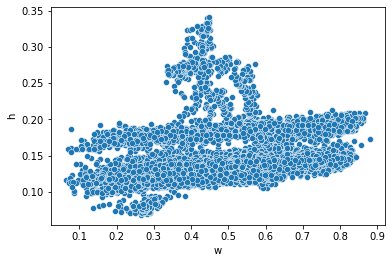

In [603]:
sb.scatterplot(data["w"],data["h"])

In [604]:
from sklearn.mixture import GaussianMixture

In [605]:
gm = GaussianMixture(n_components=3, random_state=0, covariance_type="full", init_params="random")

In [606]:
dat = data[["w","h"]]

In [607]:
gm.fit(dat)

GaussianMixture(init_params='random', n_components=3, random_state=0)

In [608]:
data["cluster"] = gm.predict(data[["w","h"]])

In [609]:
data["cluster"].value_counts()

2    6719
1    1999
0     699
Name: cluster, dtype: int64

/Users/dhruvchopra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='w', ylabel='h'>

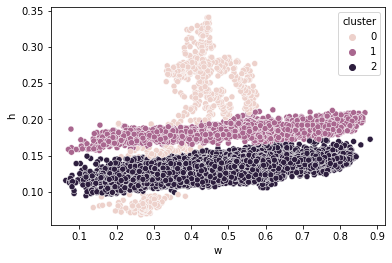

In [610]:
sb.scatterplot(data["w"],data["h"], hue=data["cluster"])

Cluster 2 represents the similar width and height of "red" and "blue" buses at NTU

Cluster 1 repesents the "199" width and height

For Cluster 0, three types of observations were noted:
1) Construction minijeeps with height<0.10 frame units which were missclassified as buses

2) Buses reversing and coming near the camera, which gave these instances frame height>0.20 frame units

3) Single red and blue bus frames, with a "boxing" issue, resulting in erraneous frame width and height

##### We are only going to consider Red Bus data for this project

In [611]:
busdata = data[data["cluster"]==2]
busdata.drop(columns={"cluster"},inplace=True)

/Users/dhruvchopra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [612]:
busdata.drop(columns={"class"}, inplace=True)

In [613]:
busdata.head(n=15)

,x,y,w,h,frameNo
id,,,,,
4068,0.876389,0.517969,0.241667,0.135937,4514
3655,0.870139,0.517187,0.254167,0.132812,4515
4211,0.861111,0.516016,0.266667,0.135156,4516
5745,0.845139,0.514453,0.298611,0.135156,4518
5320,0.838194,0.512891,0.315278,0.135156,4519
5887,0.829167,0.512500,0.330556,0.135937,4520
6287,0.820833,0.512891,0.347222,0.136719,4521
6844,0.812500,0.512109,0.366667,0.138281,4522
6424,0.802083,0.512500,0.381944,0.140625,4523


In [614]:
busdata["w"].mean()

0.4939816210150339

In [615]:
busdata["w"].var()

0.029316436083795697

<AxesSubplot:xlabel='w', ylabel='Count'>

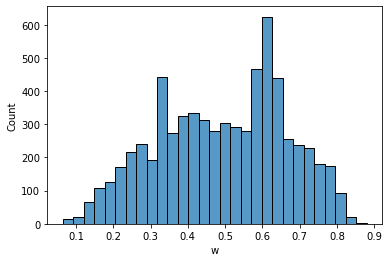

In [616]:
sb.histplot(busdata["w"])

/Users/dhruvchopra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='w'>

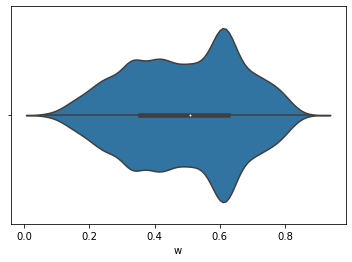

In [617]:
sb.violinplot(busdata["w"])

In [618]:
busdata["h"].mean()

0.13303052299449306

In [619]:
busdata["h"].var()

0.00015682376278292637

#### Ooops! Seems like we didn't completely remove that cluster of minijeeps, making our distribution of width bimodal
#### Going over all procedures again, with clusters = 4 this time;

In [620]:
data = pd.read_csv("Downloads/Tuesday.csv")
data.set_index("Unnamed: 0", inplace=True)
data.index.rename("id", inplace=True)
gm = GaussianMixture(n_components=4, random_state=0, covariance_type="full")
dat = data[["w","h"]]
gm.fit(dat)
data["cluster"] = gm.predict(data[["w","h"]])
data["cluster"].value_counts()

3    5721
1    2001
0    1243
2     452
Name: cluster, dtype: int64

/Users/dhruvchopra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='w', ylabel='h'>

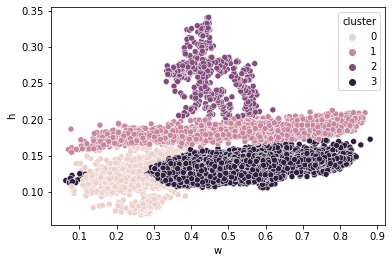

In [621]:
sb.scatterplot(data["w"],data["h"], hue=data["cluster"])

In [622]:
busdata = data[data["cluster"]==3]
busdata.drop(columns={"cluster"},inplace=True)

/Users/dhruvchopra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [623]:
busdata.drop(columns={"class"}, inplace=True)

In [624]:
busdata.head(n=10)

,x,y,w,h,frameNo
id,,,,,
5745,0.845139,0.514453,0.298611,0.135156,4518
5320,0.838194,0.512891,0.315278,0.135156,4519
5887,0.829167,0.512500,0.330556,0.135937,4520
6287,0.820833,0.512891,0.347222,0.136719,4521
6844,0.812500,0.512109,0.366667,0.138281,4522
6424,0.802083,0.512500,0.381944,0.140625,4523
5761,0.796528,0.511328,0.395833,0.139844,4524
5301,0.788194,0.510156,0.418056,0.139062,4525
4746,0.782639,0.509375,0.434722,0.137500,4526


In [625]:
busdata["w"].mean()

0.5403105548155933

In [626]:
busdata["w"].var()

0.019499269369984213

### That's it! The cluster variance for width has gone down 

/Users/dhruvchopra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

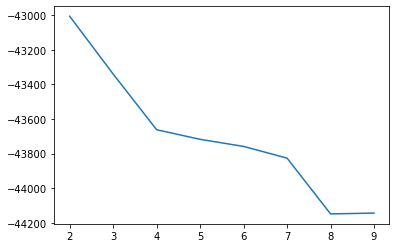

In [627]:
aic = []
for i in range(2,10):
    gm = GaussianMixture(n_components=i, random_state=0, covariance_type="full")
    gm.fit(busdata[["w","h"]])
    aic.append(gm.aic(busdata[["w","h"]]))

index = []
for i in range(2,10):
    index.append(i)
    
sb.lineplot(index,aic)

<AxesSubplot:xlabel='frameNo', ylabel='w'>

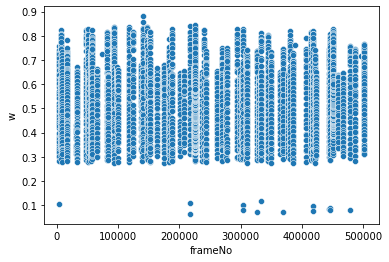

In [628]:
sb.scatterplot(x=busdata["frameNo"],y=busdata["w"])

In [629]:
aic = []
for i in range(2,301):
    gm = GaussianMixture(n_components=i, random_state=0, covariance_type="tied")
    gm.fit(busdata[["w","frameNo"]])
    aic.append(gm.aic(busdata[["w","frameNo"]]))

In [630]:
index = []
for i in range(2,301):
    index.append(i)

/Users/dhruvchopra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

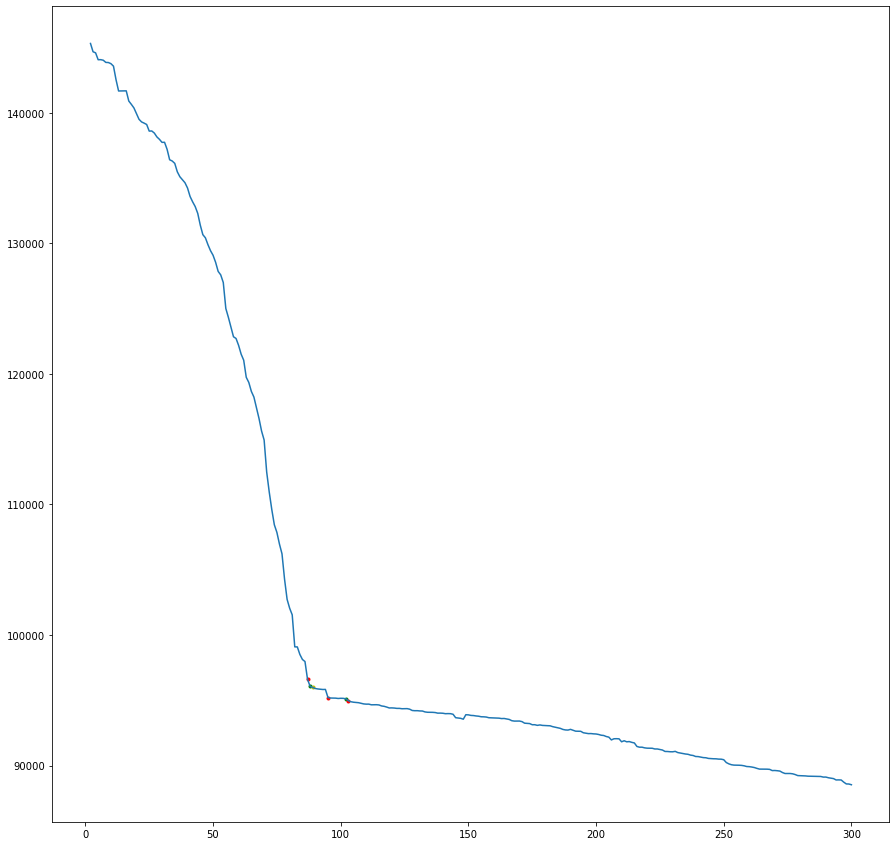

In [809]:
plt.subplots(figsize=(15,15))
plt.plot(87,aic[85], 'r.')
plt.plot(88,aic[86], 'g.')
plt.plot(89,aic[87], 'y.')
plt.plot(95,aic[93], 'r.')
plt.plot(102,aic[100], 'g.')
plt.plot(103,aic[101], 'r.')
sb.lineplot(index,aic)

In [876]:
aic[93]

95211.868436626

In [810]:
aic[80:100]

[99091.58692608768,
 99087.5048097385,
 98510.29275722278,
 98125.25462841416,
 97967.86537607241,
 96601.92901573656,
 96072.53495059785,
 95992.01737829906,
 95903.55085564288,
 95867.74606860698,
 95843.59652254554,
 95826.2029075749,
 95832.36572873734,
 95211.868436626,
 95172.4958123339,
 95169.68348119213,
 95163.22222172245,
 95138.02085144876,
 95152.27523391298,
 95147.2994676051]

In [926]:
gm = GaussianMixture(n_components=88, random_state=0, covariance_type="tied")
gm.fit(busdata[["w","frameNo"]])
busdata["cluster"]= gm.predict(busdata[["w","frameNo"]])

<ipython-input-926-2cc3bb4653db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busdata["cluster"]= gm.predict(busdata[["w","frameNo"]])


In [927]:
sample = busdata[500:1000]

/Users/dhruvchopra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='frameNo', ylabel='w'>

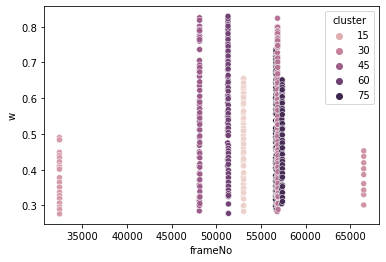

In [928]:
sb.scatterplot(sample["frameNo"],sample["w"], hue=sample["cluster"])

In [929]:
busdata["frameNo"].value_counts()[:20]

500629    2
152694    2
500638    2
500630    2
500632    2
500643    2
500628    2
152696    2
500644    2
188094    2
500631    2
152692    2
57344     1
118075    1
7481      1
7485      1
118079    1
7489      1
459161    1
7477      1
Name: frameNo, dtype: int64

In [942]:
500629/(30*60)

278.1272222222222

In [930]:
busdata[busdata["frameNo"]==500629]

,x,y,w,h,frameNo,cluster,type
id,,,,,,,
4271,0.383333,0.487500,0.766667,0.129688,500629,13,red
4272,0.588889,0.484375,0.338889,0.110937,500629,13,blue


id
5745      4518
5320      4519
5887      4520
6287      4521
6844      4522
         ...  
1112    500659
1736    500660
1347    500661
1978    500662
2350    500663
Name: frameNo, Length: 5721, dtype: int64


/Users/dhruvchopra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='frameNo', ylabel='w'>

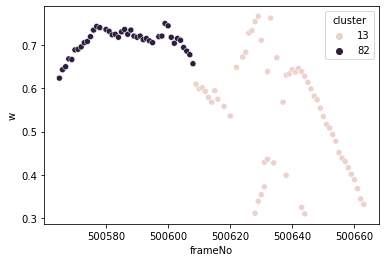

In [931]:
sample = busdata[-100:]
print(busdata["frameNo"])
sb.scatterplot(sample["frameNo"],sample["w"], hue=sample["cluster"])

In [932]:
print(len(busdata["cluster"].value_counts()))
busdata["cluster"].value_counts()[60:100]

88


76    55
35    55
74    55
11    54
61    53
50    53
60    53
45    52
25    52
39    52
66    51
43    51
29    50
62    49
15    49
51    49
22    49
1     48
37    47
41    47
57    46
54    46
78    41
40    41
86     4
70     1
71     1
77     1
Name: cluster, dtype: int64

### We conclude that we saw 88 - 4= 84 buses

## Determination of Red vs Blue Bus

In [933]:
for i in range(1,len(busdata)):
    if(busdata.at[busdata.index[i],"cluster"]==busdata.at[busdata.index[i-1],"cluster"]):
        if(busdata.at[busdata.index[i],"x"]>busdata.at[busdata.index[i-1],"x"]):
            busdata.at[busdata.index[i],"type"]="blue"
        else:
            busdata.at[busdata.index[i],"type"]="red"
    else:
        busdata.at[busdata.index[i],"type"]="error"

for i in range(1,len(busdata)):
    if(busdata.at[busdata.index[i],"type"]=="error"):
        busdata.at[busdata.index[i],"type"]=busdata.at[busdata.index[i+1],"type"]

In [934]:
busdata[["cluster","type"]].value_counts()

cluster  type 
12       red      110
6        red      100
36       red       97
65       blue      97
75       red       94
                 ... 
71       error      1
70       error      1
68       blue       1
58       red        1
77       error      1
Length: 126, dtype: int64

In [935]:
data_cluster = busdata.set_index(["cluster"])

In [936]:
data_cluster.head(10)

,x,y,w,h,frameNo,type
cluster,,,,,,
49,0.845139,0.514453,0.298611,0.135156,4518,red
49,0.838194,0.512891,0.315278,0.135156,4519,red
49,0.829167,0.512500,0.330556,0.135937,4520,red
49,0.820833,0.512891,0.347222,0.136719,4521,red
49,0.812500,0.512109,0.366667,0.138281,4522,red
49,0.802083,0.512500,0.381944,0.140625,4523,red
49,0.796528,0.511328,0.395833,0.139844,4524,red
49,0.788194,0.510156,0.418056,0.139062,4525,red
49,0.782639,0.509375,0.434722,0.137500,4526,red


In [937]:
for i in pd.Series(data_cluster.index).unique():
    if(len(data_cluster.loc[i])>10):
        data_cluster.loc[i,"corr"]=data_cluster.loc[i,["x","frameNo"]].corr()["x"]["frameNo"]
    else:
        data_cluster.loc[i,"corr"]=0

<AxesSubplot:xlabel='corr', ylabel='frameNo'>

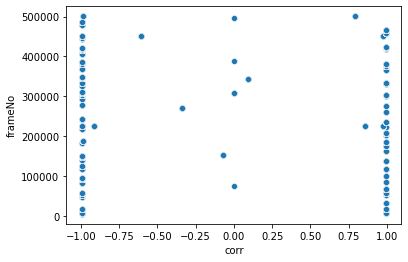

In [938]:
sb.scatterplot(x=data_cluster["corr"],y=data_cluster["frameNo"])

In [939]:
data_cluster[(data_cluster["corr"]<0.5) & (data_cluster["corr"]>-0.5)][50:100]

,x,y,w,h,frameNo,type,corr
cluster,,,,,,,
4,0.259722,0.486719,0.513889,0.150000,152683,red,-0.070827
4,0.259722,0.483594,0.511111,0.151562,152684,red,-0.070827
4,0.259028,0.480078,0.515278,0.153906,152685,red,-0.070827
4,0.252778,0.481641,0.494444,0.139844,152686,red,-0.070827
4,0.231944,0.485156,0.450000,0.148438,152687,red,-0.070827
4,0.222222,0.481641,0.444444,0.136719,152688,red,-0.070827
4,0.213889,0.482422,0.425000,0.142969,152689,red,-0.070827
4,0.200694,0.480469,0.401389,0.135937,152690,red,-0.070827
4,0.330556,0.480469,0.627778,0.157813,152691,blue,-0.070827


In [940]:
smaple = data_cluster[data_cluster.index==4]

/Users/dhruvchopra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='frameNo', ylabel='w'>

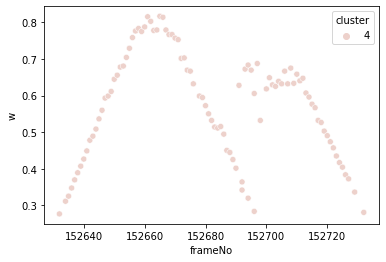

In [941]:
sb.scatterplot(smaple["frameNo"],smaple["w"], hue=smaple.index)

In [925]:
data_cluster.loc[i,["x","frameNo"]].corr()["x"]["frameNo"]

0.7891658067277243